In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
# Load the data
gene_specific_data = pd.read_csv('C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\gene_specific_predictors\\metrics_gene_specific_predictors.csv')
general_performance_data = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\metrics_all_protein_type_predictors.csv")

In [39]:
gene_specific_data

,gene,sensitivity,specificity,precision,accuracy,mcc,num_variants,num_benign,num_pathogenic,TP,FP,FN,TN
0,COL2A1,0.912587,0.950376,0.887755,0.939012,0.856308,951,665,286,261,33,25,632
1,COL4A5,0.958231,0.964758,0.979899,0.960568,0.915396,634,227,407,390,8,17,219
2,COL4A3,0.842520,0.943182,0.877049,0.910486,0.794155,391,264,127,107,15,20,249
3,SLC26A4,0.830189,0.729412,0.905350,0.805714,0.520853,350,85,265,220,23,45,62
4,MYO7A,0.742857,0.875000,0.511475,0.855207,0.534420,1402,1192,210,156,149,54,1043
5,FGFR1,0.766917,0.887640,0.718310,0.854806,0.641638,489,356,133,102,40,31,316
6,WFS1,0.860465,0.782609,0.831461,0.825806,0.646350,310,138,172,148,30,24,108


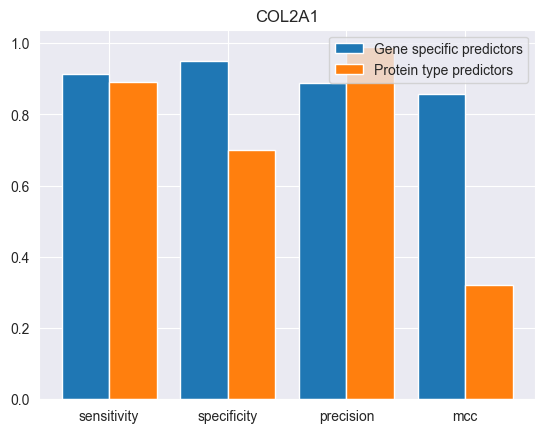

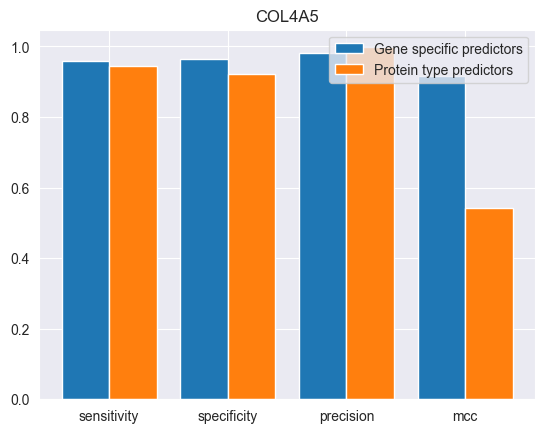

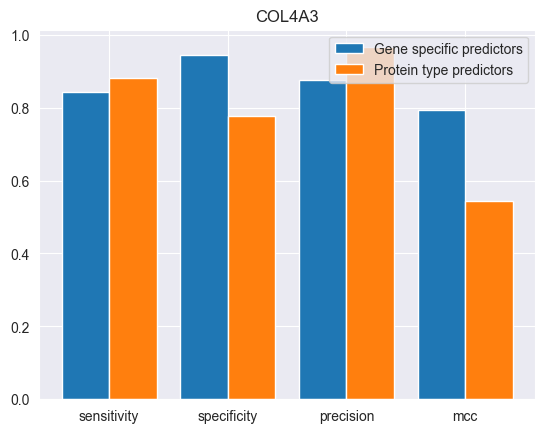

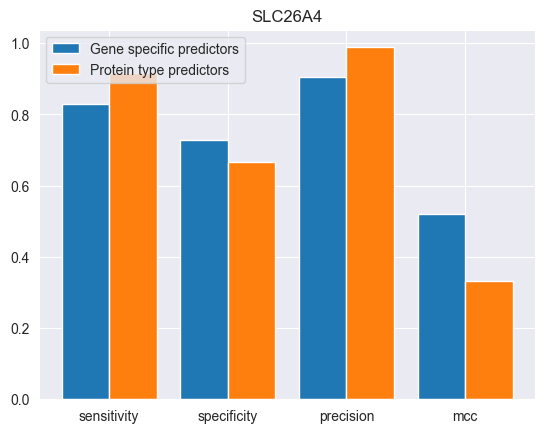

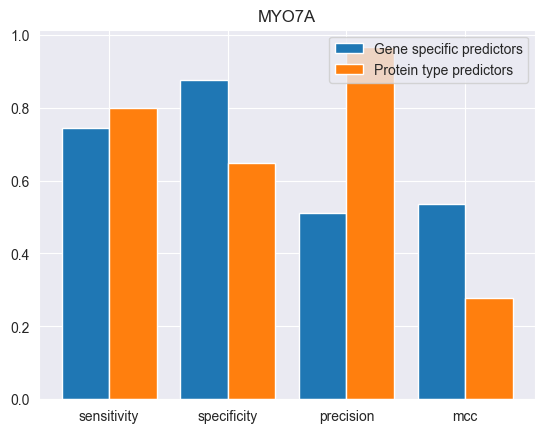

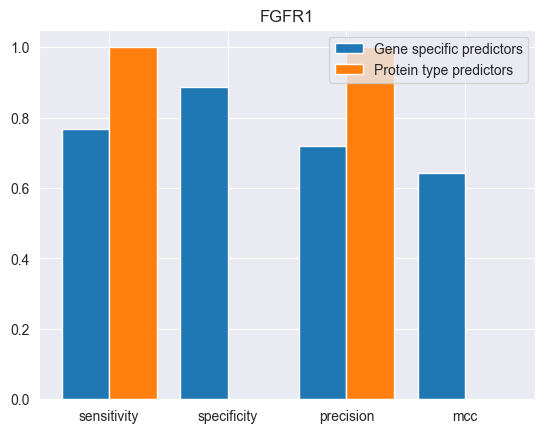

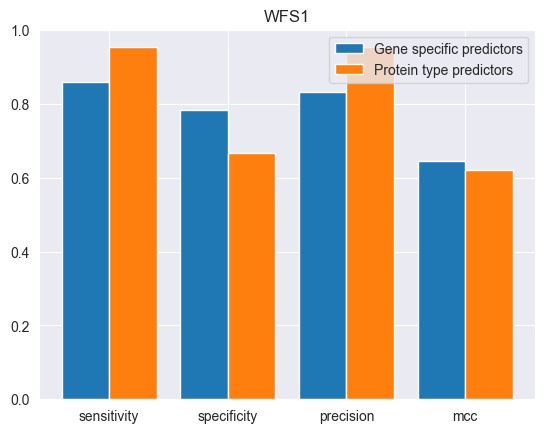

In [40]:
genes = gene_specific_data['gene']


for gene in genes:
    # Create a bar plot for each gene, comparing the performance of the gene specific predictors to the general predictors in 4 metrics: sensitivity, specificity, precision and mcc.
    gene_specific = gene_specific_data[gene_specific_data['gene'] == gene]
    general = general_performance_data[general_performance_data['gene'] == gene]
    metrics = ['sensitivity', 'specificity', 'precision', 'mcc']
    gene_specific_metrics = gene_specific[metrics].values[0]
    general_metrics = general[metrics].values[0]
    x = range(len(metrics))
    plt.bar(x, gene_specific_metrics, width=0.4, label='Gene specific predictors')
    plt.bar([i+0.4 for i in x], general_metrics, width=0.4, label='Protein type predictors')
    plt.xticks([i+0.2 for i in x], metrics)
    plt.title(gene)
    plt.legend()
    plt.show()

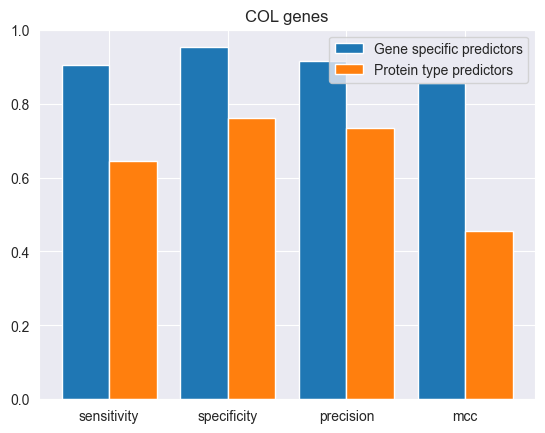

In [41]:
# First, filter the data to include only the genes starting with COL.
col_genes_gene_specific = gene_specific_data[gene_specific_data['gene'].str.startswith('COL')]
# Calculate the average metrics for the gene specific predictors and the general predictors.
# Create one bar plot for the average metrics in all the genes starting with COL.
col_gene_specific_sensitivity = gene_specific_data[gene_specific_data['gene'].str.startswith('COL')]["sensitivity"].mean()
col_gene_specific_specificity = gene_specific_data[gene_specific_data['gene'].str.startswith('COL')]["specificity"].mean()
col_gene_specific_precision = gene_specific_data[gene_specific_data['gene'].str.startswith('COL')]["precision"].mean()
col_gene_specific_mcc = gene_specific_data[gene_specific_data['gene'].str.startswith('COL')]["mcc"].mean()
col_protein_type_metrics = [col_gene_specific_sensitivity, col_gene_specific_specificity, col_gene_specific_precision, col_gene_specific_mcc]

# Calculate the average metrics for the gene specific predictors.
col_general_sensitivity = general_performance_data[general_performance_data['gene'].str.startswith('COL')]["sensitivity"].mean()
col_general_specificity = general_performance_data[general_performance_data['gene'].str.startswith('COL')]["specificity"].mean()
col_general_precision = general_performance_data[general_performance_data['gene'].str.startswith('COL')]["precision"].mean()
col_general_mcc = general_performance_data[general_performance_data['gene'].str.startswith('COL')]["mcc"].mean()
col_gene_specific_metrics = [col_general_sensitivity, col_general_specificity, col_general_precision, col_general_mcc]

# Create the bar plot
x = range(len(metrics))
plt.bar(x, col_protein_type_metrics, width=0.4, label='Gene specific predictors')
plt.bar([i+0.4 for i in x], col_gene_specific_metrics, width=0.4, label='Protein type predictors')
plt.xticks([i+0.2 for i in x], metrics)
plt.title('COL genes')
plt.legend()
plt.show()



In [42]:
# Print the values of the average metrics for the gene specific predictors and the general predictors.print("Gene specific predictors:")
print("Sensitivity: ", col_gene_specific_sensitivity)
print("Specificity: ", col_gene_specific_specificity)
print("Precision: ", col_gene_specific_precision)
print("MCC: ", col_gene_specific_mcc)

print("Protein type predictors:")
print("Sensitivity: ", col_general_sensitivity)
print("Specificity: ", col_general_specificity)
print("Precision: ", col_general_precision)
print("MCC: ", col_general_mcc)


Sensitivity:  0.9044460186797899
Specificity:  0.9527718223939394
Precision:  0.9149012597759563
MCC:  0.8552862439135741
Protein type predictors:
Sensitivity:  0.6451383696
Specificity:  0.7611355311
Precision:  0.733295328
MCC:  0.45642223660000003


In [49]:
df_globular_predictions_vs_real = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\transmembrane_residues\\predictions_vs_real_transmembrane_residues.csv")
df_globular_predictions_vs_real["wt_aa"] = df_globular_predictions_vs_real["variant"].str[0]
df_globular_predictions_vs_real["mut_aa"] = df_globular_predictions_vs_real["variant"].str[-1]
df_globular_predictions_vs_real["position"] = df_globular_predictions_vs_real["variant"].str[1:-1]
df_globular_predictions_vs_real["substitution"] = df_globular_predictions_vs_real["wt_aa"] + df_globular_predictions_vs_real["mut_aa"]

df_globular_predictions_vs_real["substitution"].value_counts()

# Calculate how many TP, FP, TN and FN there are for each substitution.
substitutions = df_globular_predictions_vs_real["substitution"].unique()
substitution_counts = {}
for substitution in substitutions:
    substitution_df = df_globular_predictions_vs_real[df_globular_predictions_vs_real["substitution"] == substitution]
    TP = substitution_df[(substitution_df["reality"] == 1) & (substitution_df["prediction"] == 1)].shape[0]
    FP = substitution_df[(substitution_df["reality"] == 0) & (substitution_df["prediction"] == 1)].shape[0]
    TN = substitution_df[(substitution_df["reality"] == 0) & (substitution_df["prediction"] == 0)].shape[0]
    FN = substitution_df[(substitution_df["reality"] == 1) & (substitution_df["prediction"] == 0)].shape[0]
    substitution_counts[substitution] = {"TP": TP, "FP": FP, "TN": TN, "FN": FN}

In [50]:
# Print the counts of TP, FP, TN and FN for each substitution.
for substitution in substitution_counts:
    print(substitution)
    print(substitution_counts[substitution])
    
print(df_globular_predictions_vs_real["substitution"].value_counts())

LP
{'TP': 34, 'FP': 0, 'TN': 0, 'FN': 0}
TI
{'TP': 6, 'FP': 0, 'TN': 0, 'FN': 0}
LH
{'TP': 2, 'FP': 0, 'TN': 0, 'FN': 0}
FS
{'TP': 5, 'FP': 0, 'TN': 0, 'FN': 0}
GR
{'TP': 23, 'FP': 1, 'TN': 0, 'FN': 0}
GD
{'TP': 14, 'FP': 0, 'TN': 0, 'FN': 0}
TP
{'TP': 3, 'FP': 0, 'TN': 0, 'FN': 0}
VF
{'TP': 2, 'FP': 1, 'TN': 0, 'FN': 1}
MI
{'TP': 2, 'FP': 1, 'TN': 0, 'FN': 1}
SL
{'TP': 9, 'FP': 0, 'TN': 0, 'FN': 0}
QR
{'TP': 3, 'FP': 0, 'TN': 0, 'FN': 0}
RH
{'TP': 5, 'FP': 1, 'TN': 0, 'FN': 0}
FL
{'TP': 7, 'FP': 1, 'TN': 0, 'FN': 2}
RP
{'TP': 2, 'FP': 0, 'TN': 0, 'FN': 0}
RC
{'TP': 6, 'FP': 0, 'TN': 0, 'FN': 0}
FC
{'TP': 4, 'FP': 0, 'TN': 0, 'FN': 0}
VM
{'TP': 9, 'FP': 1, 'TN': 4, 'FN': 4}
GV
{'TP': 11, 'FP': 1, 'TN': 0, 'FN': 0}
IV
{'TP': 2, 'FP': 2, 'TN': 0, 'FN': 2}
AV
{'TP': 12, 'FP': 0, 'TN': 2, 'FN': 2}
FY
{'TP': 1, 'FP': 0, 'TN': 0, 'FN': 0}
WR
{'TP': 4, 'FP': 0, 'TN': 0, 'FN': 0}
CF
{'TP': 2, 'FP': 0, 'TN': 0, 'FN': 0}
DH
{'TP': 2, 'FP': 0, 'TN': 0, 'FN': 0}
GE
{'TP': 6, 'FP': 0, 'TN': 0, 'FN'

In [51]:
# Save the counts of TP, FP, TN and FN for each substitution to a csv file.
substitution_counts_df = pd.DataFrame(substitution_counts).T
substitution_counts_df.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\transmembrane_residues\\substitution_counts_transmembrane_protein_type.csv")

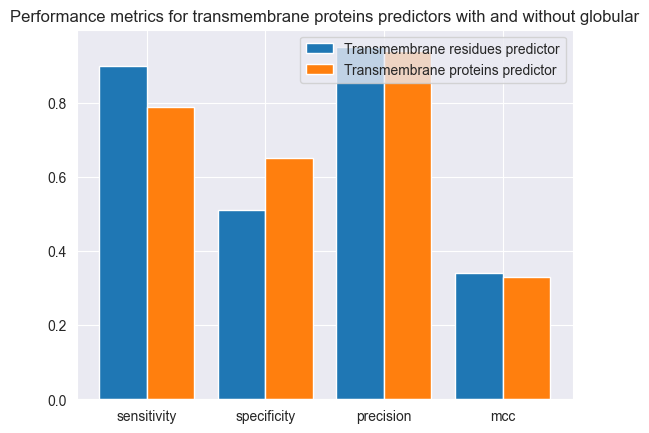

In [54]:
results_transmembrane_residues_dict = {"sensitivity": 0.9, "specificity": 0.51, "precision": 0.95, "mcc": 0.34}
results_with_globular_dict = {"sensitivity": 0.79, "specificity": 0.65, "precision": 0.94, "mcc": 0.33}

# Plot the results of the transmembrane residues predictors with and without the globular in a bar plot.
plt.bar(range(len(results_transmembrane_residues_dict)), list(results_transmembrane_residues_dict.values()), width=0.4, label='Transmembrane residues predictor')
plt.bar([i+0.4 for i in range(len(results_with_globular_dict))], list(results_with_globular_dict.values()), width=0.4, label='Transmembrane proteins predictor')
plt.xticks([i+0.2 for i in range(len(results_transmembrane_residues_dict))], list(results_transmembrane_residues_dict.keys()))
plt.title('Performance metrics for transmembrane proteins predictors with and without globular')
plt.legend()
plt.show()